# Cyber Security Project

### Problem Statement:

Book-My-Show will enable the ads on their website, but they are also very cautious about their user privacy and information who visit their website. Some ads URL could contain a malicious link that can trick any recipient and lead to a malware installation, freezing the system as part of a ransomware attack or revealing sensitive information. Book-My-Show now wants to analyze that whether the particular URL is prone to phishing (malicious) or not.


### Dataset Details: 

The input dataset contains an 11k sample corresponding to the 11k URL. Each sample contains 32 features that give a different and unique description of URL ranging from -1,0,1.

| Value | URL description |
|-------|-----------------|
| -1    | Phishing        |
| 0     | Suspicious      |
| 1     | Legitimate      |

The sample could be either legitimate or phishing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read the provided dataset. 

df = pd.read_csv('../data/dataset.csv')
df

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


In [3]:
# The "index" column is unnecessary and it is a duplicate of the table index, so we can drop it.

df = df.drop(columns=['index'])
df

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [4]:
df.shape

# 31 remaining columns as the "index" column was discarded.

(11055, 31)

In [5]:
df.info()

# The dataset is a Pandas DataFrame.
# All columns are integer values.
# All columns have a Non-Null Count equal to the rows number (11055) which shows that there are no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

-----

### Exploratory Data Analysis:

    1. Each sample has 31 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 


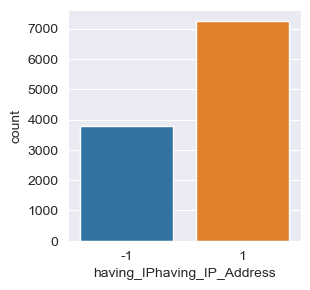

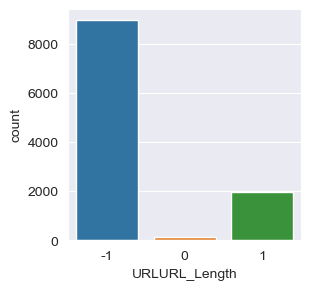

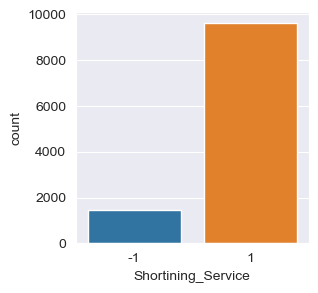

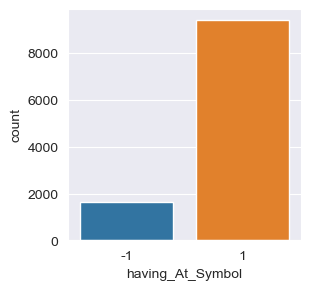

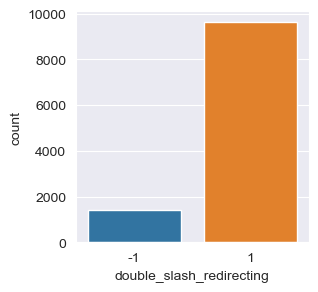

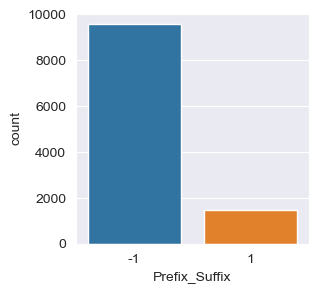

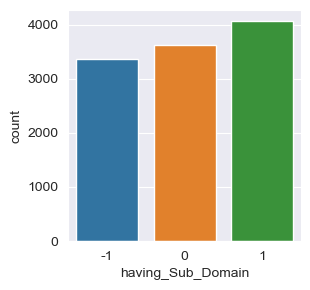

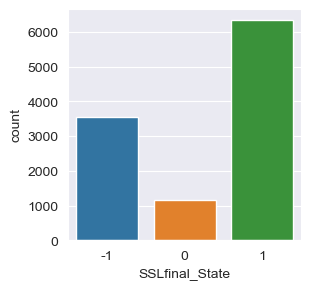

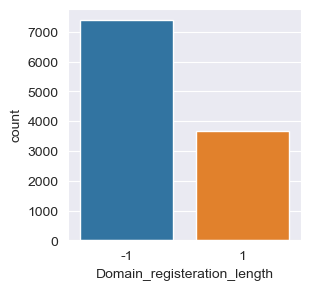

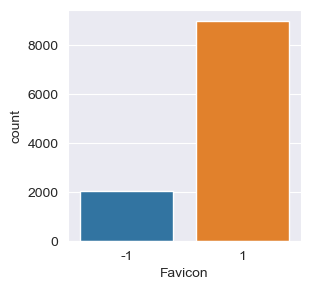

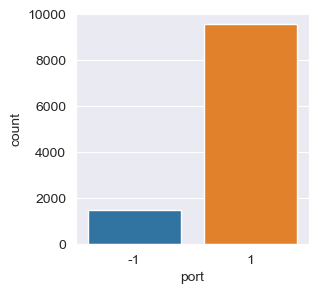

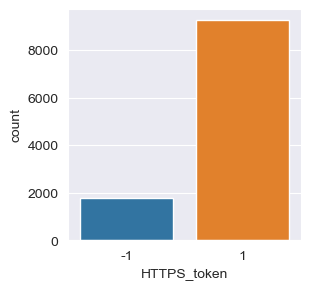

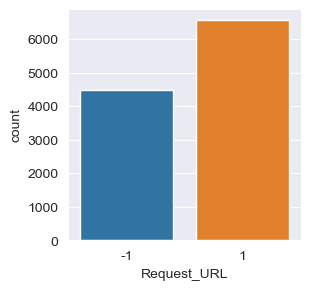

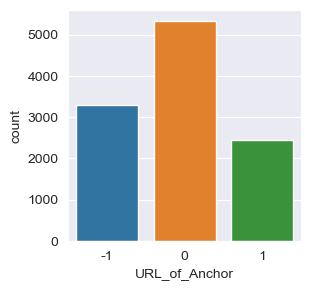

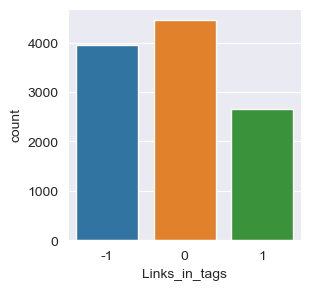

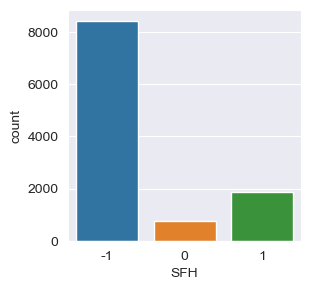

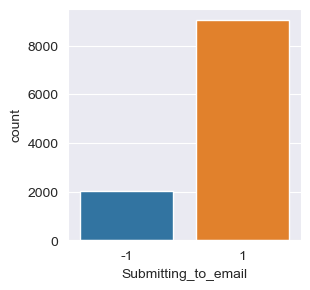

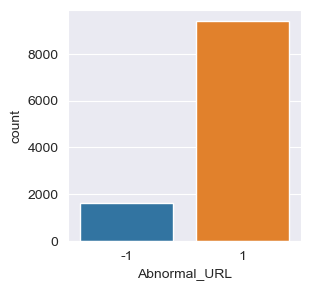

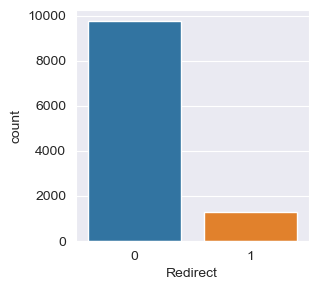

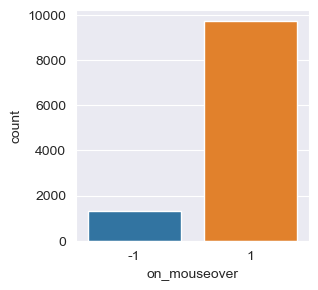

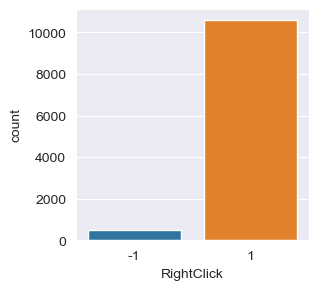

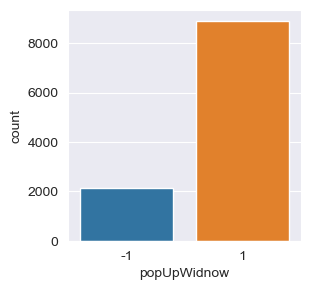

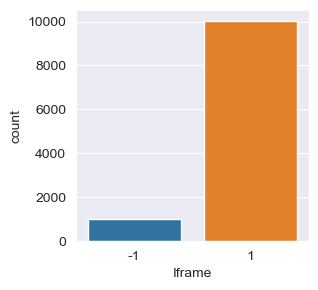

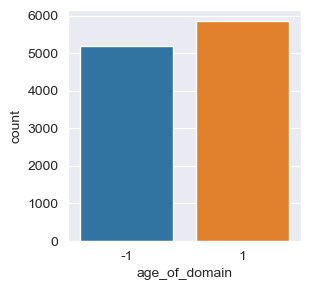

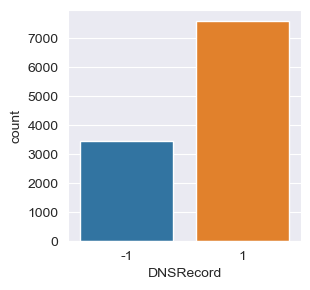

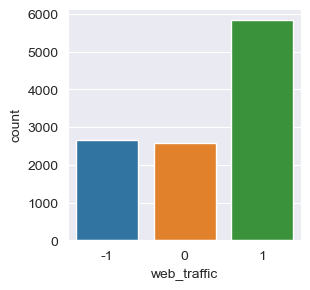

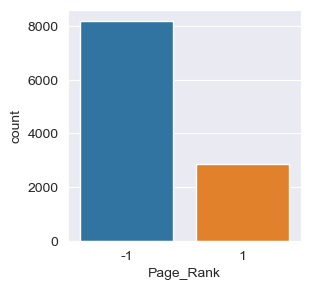

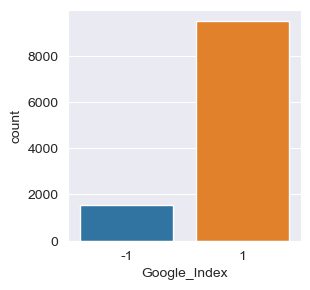

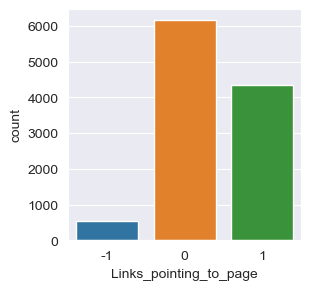

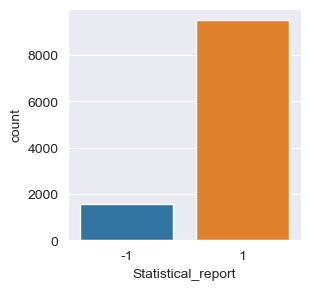

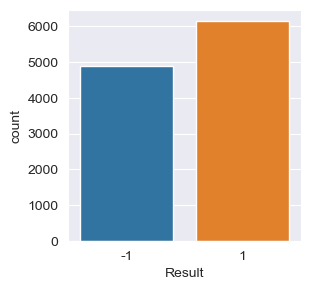

In [6]:
for col in df.columns:
    plt.figure(figsize=(3, 3))
    sns.countplot(data=df, x=col)
    plt.show()
    
# This confirms that all columns have at most these 3 values: -1, 0 and 1. 
# Some columns have only -1 and 1. 
# Some other have 0 and 1.    

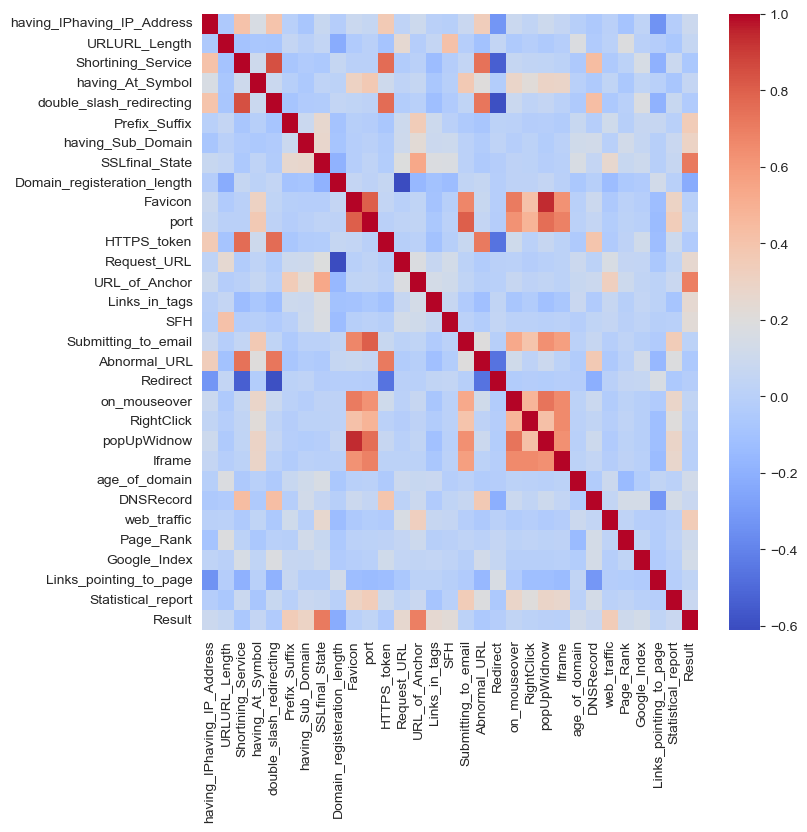

In [7]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

# It looks like there is a correlation between "popUpWidnow" and "Favicon" features.

-----

    2. Determine the number of samples present in the data, unique elements in all the features. 

In [8]:
df[df.duplicated()]

# All these rows are duplicated.
# There are 5206 duplicated rows.

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
180,1,-1,1,1,1,-1,-1,1,-1,1,...,1,1,1,1,1,1,1,0,1,1
203,1,-1,1,1,1,-1,-1,1,-1,1,...,1,1,-1,1,1,-1,1,0,1,1
323,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
364,1,-1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,1,-1,1,1,1,1
381,1,-1,1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,1,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11047,-1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1


In [9]:
# Duplicated rows have to be discarded.

df.drop_duplicates(inplace=True)

# And then check again.

df[df.duplicated()]

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result


In [10]:
df.shape

# 5849 remaining rows as 5206 were discarded.
# 5849 + 5206 = 11055 total initial number of rows.

(5849, 31)

-----

    3. Check if there is any null value in any features. 

In [11]:
df.isna().any().any()

# This confirms that there are no null value in the remaining dataset.

False

-----

### Correlation of features and feature selection:

    4. Next, we have to find if there are any correlated features present in the data. Remove the feature which might be correlated with some threshold.


In [12]:
df_features = df.drop(['Result'], axis = 1)
df_features

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,1,-1,-1,1,-1,-1,-1,-1,-1,1,...,1,1,1,1,-1,0,-1,1,0,1
11045,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,0,-1,1,0,1
11048,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,1,0,-1,1,0,1
11049,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,1,-1,1,1,-1,1,1,1


In [13]:
correlation_matrix = df_features.corr()
correlation_matrix

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
having_IPhaving_IP_Address,1.000000,-0.040473,0.301725,0.148862,0.293266,0.024366,-0.064956,0.067208,-0.013651,0.083762,...,0.040827,0.099592,0.054807,-0.015805,-0.085114,-0.003703,-0.087927,0.010300,-0.314681,-0.045373
URLURL_Length,-0.040473,1.000000,-0.112819,-0.060435,-0.084463,0.070989,-0.006535,0.048342,-0.226193,-0.001824,...,0.002248,-0.016198,0.004811,0.221336,-0.044279,-0.000348,0.220011,-0.002480,-0.038011,-0.032996
Shortining_Service,0.301725,-0.112819,1.000000,0.133856,0.815809,-0.071278,-0.049859,-0.066683,0.060993,0.009649,...,0.061300,0.048578,0.032366,-0.053506,0.488871,-0.032635,-0.002555,0.186332,-0.179253,0.028998
having_At_Symbol,0.148862,-0.060435,0.133856,1.000000,0.112493,-0.015395,-0.053146,0.020751,0.020013,0.383249,...,0.258423,0.366523,0.344610,-0.002238,-0.013184,0.015039,-0.053646,0.019846,-0.029701,-0.082859
double_slash_redirecting,0.293266,-0.084463,0.815809,0.112493,1.000000,-0.077538,-0.051302,-0.038359,0.043342,0.032272,...,0.044518,0.057585,0.023302,-0.054262,0.485620,-0.047766,-0.019120,0.218521,-0.166749,0.013956
Prefix_Suffix,0.024366,0.070989,-0.071278,-0.015395,-0.077538,1.000000,0.104876,0.278177,-0.110907,-0.010905,...,-0.025839,-0.007894,-0.038888,0.063193,-0.022770,0.106466,-0.002263,0.062539,0.071123,0.017894
having_Sub_Domain,-0.064956,-0.006535,-0.049859,-0.053146,-0.051302,0.104876,1.000000,0.255770,-0.083085,-0.035891,...,0.010743,-0.038745,-0.001880,0.032986,0.089132,-0.044901,0.093202,0.066567,0.019548,0.097661
SSLfinal_State,0.067208,0.048342,-0.066683,0.020751,-0.038359,0.278177,0.255770,1.000000,-0.175864,-0.027138,...,0.019511,-0.023704,-0.004498,0.107550,0.019273,0.211850,0.020743,0.078182,0.019410,0.089295
Domain_registeration_length,-0.013651,-0.226193,0.060993,0.020013,0.043342,-0.110907,-0.083085,-0.175864,1.000000,0.063998,...,0.025952,0.061336,0.005354,-0.058693,0.013673,-0.112966,-0.068845,-0.032338,0.103013,-0.022538
Favicon,0.083762,-0.001824,0.009649,0.383249,0.032272,-0.010905,-0.035891,-0.027138,0.063998,1.000000,...,0.395078,0.933145,0.622273,-0.004568,0.061194,-0.055462,0.021655,-0.025568,-0.127583,0.187324


In [14]:
# Let's fix the correlation threshold at 0.9
threshold = 0.9

correlation_absolute = correlation_matrix.abs()
high_correlation_predicate = correlation_absolute > threshold
high_correlation_columns = [(c1, c2) for c1 in correlation_absolute.columns for c2 in correlation_absolute.columns 
                          if (high_correlation_predicate[c1][c2] and c1 != c2)]
print(high_correlation_columns)

# As previously observed in the heatmap 'popUpWidnow' and 'Favicon' are correlated.

[('Favicon', 'popUpWidnow'), ('popUpWidnow', 'Favicon')]


In [15]:
# We need to drop one of the 2 correlated features.

df = df.drop(columns=['popUpWidnow'])
df

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,1,-1,-1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1
11045,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
11048,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
11049,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,-1


In [16]:
df.shape

(5849, 30)

-----

### Building Classification Model

#### Build classification models using a binary classifier to detect malicious or phishing URLs.

In [17]:
# We need to split the data into train and test data.

from sklearn.model_selection import train_test_split 

features = df.drop(['Result'], axis = 1)
target = df[['Result']]

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=10)

# In order to avoid DataConversionWarning lately (A column-vector y was passed when a 1d array was expected).
y_train = np.ravel(y_train)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4386, 29)
(1463, 29)
(4386,)
(1463, 1)


In [18]:
# Train with the Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_ranfor = RandomForestClassifier(random_state=42) 
model_ranfor.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

def print_reporting(prediction_train, prediction_test):
    print('Accuracy on Train set:', accuracy_score(y_train, prediction_train))
    print('Accuracy on Test set:', accuracy_score(y_test, prediction_test))
    print('\n')
    print('Confusion Matrix on Train set:\n', confusion_matrix(y_train, prediction_train))
    print('\n')
    print('Confusion Matrix on Test set:\n', confusion_matrix(y_test, prediction_test))
    print('\n')
    print('Precision on Train set:', precision_score(y_train, prediction_train))
    print('Precision on Test set:', precision_score(y_test, prediction_test))
    print('\n')
    print('Recall on Train set:', recall_score(y_train, prediction_train))
    print('Recall on Test set:', recall_score(y_test, prediction_test))
    print('\n')
    print('F1-Score on Train set:', f1_score(y_train, prediction_train))
    print('F1-Score on Test set:', f1_score(y_test, prediction_test))
    print('\n')
    print('Classification Report on Train set:')
    print(classification_report(y_train, prediction_train))
    print('\n')
    print('Classification Report on Test set:')
    print(classification_report(y_test, prediction_test))
    
# Predictions and reporting

preds_ranfor_train = model_ranfor.predict(X_train)
preds_ranfor_test = model_ranfor.predict(X_test)

print_reporting(preds_ranfor_train, preds_ranfor_test)


Accuracy on Train set: 0.9906520747834018
Accuracy on Test set: 0.9391660970608339


Confusion Matrix on Train set:
 [[2229   23]
 [  18 2116]]


Confusion Matrix on Test set:
 [[715  52]
 [ 37 659]]


Precision on Train set: 0.989247311827957
Precision on Test set: 0.9268635724331927


Recall on Train set: 0.9915651358950328
Recall on Test set: 0.9468390804597702


F1-Score on Train set: 0.9904048677743973
F1-Score on Test set: 0.9367448471926084


Classification Report on Train set:
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      2252
           1       0.99      0.99      0.99      2134

    accuracy                           0.99      4386
   macro avg       0.99      0.99      0.99      4386
weighted avg       0.99      0.99      0.99      4386



Classification Report on Test set:
              precision    recall  f1-score   support

          -1       0.95      0.93      0.94       767
           1       0.93      0.95    


#### Additional note:  

The Classification Report on Test set with the Random Forest is the best I obtained.  
I tried with the Logistic Regresion, SVM and AdaBoost classifiers. They're all less performant than Random Forest for our case.


##### Logistic Regression:  

    Classification Report on Test set:
                  precision    recall  f1-score   support
    
              -1       0.91      0.93      0.92       767
               1       0.92      0.90      0.91       696

        accuracy                           0.91      1463
       macro avg       0.91      0.91      0.91      1463
    weighted avg       0.91      0.91      0.91      1463


##### SVM:  

    Classification Report on Test set:
                  precision    recall  f1-score   support

              -1       0.94      0.93      0.93       767
               1       0.92      0.94      0.93       696

        accuracy                           0.93      1463
       macro avg       0.93      0.93      0.93      1463
    weighted avg       0.93      0.93      0.93      1463


##### AdaBoost:  

    Classification Report on Test set:
                  precision    recall  f1-score   support

              -1       0.94      0.92      0.93       767
               1       0.91      0.94      0.93       696

        accuracy                           0.93      1463
       macro avg       0.93      0.93      0.93      1463
    weighted avg       0.93      0.93      0.93      1463



----- 

#### Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.


Area Under Curve: 0.99


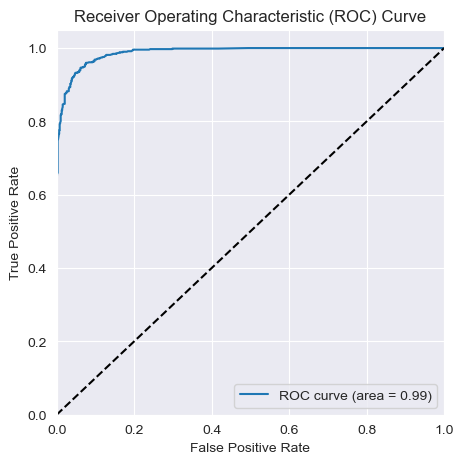

In [20]:
from sklearn import metrics

y_pred_prob = model_ranfor.predict_proba(X_test)[:, 1]
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred_prob)

# Compute ROC area
area_under_curve = metrics.auc(false_positive_rate, true_positive_rate)
print('Area Under Curve: %.2f' % area_under_curve)

plt.figure(figsize=(5, 5))
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



#### Additional note:  

The curve is approaching extremely fast the top left corner of the plot which is a very good indicator.  
The Area Under Curve is at 0.99. The Random Forest classifier is excellent for our problem. It is almost 1 which is the perfect classifier.

-----

#### Validate the accuracy of data by the K-Fold cross-validation technique.

In [21]:
from sklearn.model_selection import KFold, cross_val_score

number_splits = 5
k_folds = KFold(n_splits = number_splits)
scores = cross_val_score(model_ranfor, X_train, y_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: %.2f" % scores.mean())


Cross Validation Scores:  [0.92824601 0.9395667  0.94754846 0.94526796 0.92930445]
Average CV Score: 0.94



#### Additional note:  

The Average CV Score at 0.94 is excellent.  
The Cross Validation Scores are better than those of Linear Regression, SVM and AdaBoost.
This confirms that the Random Forest classifier is an excellent classifier for our project.


##### Linear Regression:

    Cross Validation Scores:  [0.90774487 0.91448119 0.9395667  0.92588369 0.92474344]
    Average CV Score: 0.92


##### SVM:

    Cross Validation Scores:  [0.9214123  0.92246294 0.95438997 0.9327252  0.9350057 ]
    Average CV Score: 0.93


#### AdaBoost:

    Cross Validation Scores:  [0.92596811 0.92702395 0.94412771 0.94184721 0.9395667 ]
    Average CV Score: 0.94

